In [4]:
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Research Question
Is there a relationship in how happy a country is and the music the people of this country listen to?

### Introduction
Attempting to understand what makes a country "happy" is often attributable to freedom, social support, life expectancy, health, among others; however, the music the people of said country listen to is often not one of these factors given its weak relationship and versatility across the world. Although our research question does not attempt to attribute the type of music a country listens to to its happiness index score (it would be difficult to establish given reverse causality), we are more interested in observing what trends are apparent in some of the happiest and less happiest countries with respect to the music they listen to. 

We will be using the happiness rank and happiness score for the year 2017, provided by a dataset on Kaggle by Sustainable Development Solutions Network. As for the music, we will be using two distinct spotify datasets for the year 2017 from Kaggle. We will be using features of one of these datasets, such as genre and danceability score, in order to draw comparisons with our happiness scores. 

In [5]:
happy2015=pd.read_csv("2015.csv")
happy2016=pd.read_csv("2016.csv")
happy2017=pd.read_csv("2017.csv")
happy2018=pd.read_csv("2018.csv")
happy2019=pd.read_csv("2019.csv")

In [6]:
#allspotifydata=pd.read_csv("data 2.csv")
#countries=pd.unique(allspotifydata['Region'])

#allcountries=[]
#for country in countries:
    #allcountries.append(allspotifydata[allspotifydata['Region']==country])

#count=1
#for df in allcountries:
    #name='country'+str(count)+'.csv'
    #df.to_csv(r'C:\Users\Eva\Downloads\country'+str(count)+'.csv')
    #count=count+1

In [7]:
argentina=pd.read_csv("argentina.csv")
australia=pd.read_csv("australia.csv")
austria=pd.read_csv("austria.csv")
belgium=pd.read_csv("belgium.csv")
bolivia=pd.read_csv("bolivia.csv")
brazil=pd.read_csv("brazil.csv")
canada=pd.read_csv("canada.csv")
chile=pd.read_csv("chile.csv")
colombia=pd.read_csv("colombia.csv")
costarica=pd.read_csv("costarica.csv")
czechrepublic=pd.read_csv("czechrepublic.csv")
denmark=pd.read_csv("denmark.csv")
dominicanrepublic=pd.read_csv("dominicanrepublic.csv")
ecuador=pd.read_csv("ecuador.csv")
elsalvador=pd.read_csv('elsalvador.csv')
estonia=pd.read_csv('estonia.csv')
finland=pd.read_csv("finland.csv")
france=pd.read_csv("france.csv")
germany=pd.read_csv("germany.csv")
Global=pd.read_csv('global.csv')
greece=pd.read_csv('greece.csv')
guatemala=pd.read_csv("guatemala.csv")
honduras=pd.read_csv("honduras.csv")
hongkong=pd.read_csv("hongkong.csv")
hungary=pd.read_csv("hungary.csv")
iceland=pd.read_csv("iceland.csv")
indonesia=pd.read_csv("indonesia.csv")
ireland=pd.read_csv("ireland.csv")
italy=pd.read_csv("italy.csv")
japan=pd.read_csv("japan.csv")
latvia=pd.read_csv("latvia.csv")
lithuania=pd.read_csv("lithuania.csv")
luxembourg=pd.read_csv("luxembourg.csv")
malaysia=pd.read_csv("malaysia.csv")
mexico=pd.read_csv("mexico.csv")
netherlands=pd.read_csv("netherlands.csv")
newzealand=pd.read_csv("newzealand.csv")
norway=pd.read_csv("norway.csv")
panama=pd.read_csv("panama.csv")
paraguay=pd.read_csv("paraguay.csv")
peru=pd.read_csv("peru.csv")
philippines=pd.read_csv("philippines.csv")
poland=pd.read_csv("poland.csv")
portugal=pd.read_csv("portugal.csv")
singapore=pd.read_csv("singapore.csv")
slovakia=pd.read_csv("slovakia.csv")
spain=pd.read_csv("spain.csv")
sweden=pd.read_csv("sweden.csv")
switzerland=pd.read_csv("switzerland.csv")
taiwan=pd.read_csv("taiwan.csv")
turkey=pd.read_csv("turkey.csv")
unitedkingdom=pd.read_csv("unitedkingdom.csv")
unitedstates=pd.read_csv("unitedstates.csv")
uruguay=pd.read_csv("uruguay.csv")

In [8]:
allspotifycountries=["argentina", "australia", "austria", "belgium", "brazil","bolivia", "canada", "chile", "colombia", "costarica", "czechrepublic","denmark", "dominicanrepublic", "estonia", "elsalvador", "Global","greece", "ecuador", "finland", "france", "germany", "guatemala", "honduras", "hongkong", "hungary", "iceland", "indonesia", "ireland", "italy", "japan", "latvia", "lithuania", "luxembourg", "malaysia", "mexico", "netherlands", "newzealand", "norway", "panama", "paraguay", "peru", "philippines", "poland", "portugal", "singapore", "slovakia", "spain", "sweden", "switzerland", "taiwan", "turkey", "unitedkingdom", "unitedstates", "uruguay"]

#list for countries that are found in both datsets.
allcountries=[]
for row in range(len(happy2017)):
    country=happy2017.loc[row,'Country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allspotifycountries:
        allcountries.append(country)      

#Happy Index from 2017 with only 'Country', 'Happiness.Rank', and 'Happiness.Score' columns and only with countries that have their own dataset for spotify daily.        
happy=pd.DataFrame({'Country':[],'Happiness.Rank':[],'Happiness.Score':[]})
for row in range(len(happy2017)):
    country=happy2017.loc[row,'Country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allcountries:       
        newrow={'Country':happy2017.loc[row,'Country'],'Happiness.Rank':happy2017.loc[row,'Happiness.Rank'],'Happiness.Score':happy2017.loc[row,'Happiness.Score']}
        happy=happy.append(newrow, ignore_index=True)

        
#Noticed that Taiwan is referred to as Taiwan Province of China on Happy Index.
newrow={'Country':happy2017.loc[32,'Country'],'Happiness.Rank':happy2017.loc[32,'Happiness.Rank'],'Happiness.Score':happy2017.loc[32,'Happiness.Score']}
happy=happy.append(newrow, ignore_index=True)

#allspotifydata[allspotifydata['Region']==country])
allcountries.append("Taiwan")
print('These are the spotify datsets we should use: ' + str(allcountries))
print(happy)

These are the spotify datsets we should use: ['norway', 'denmark', 'iceland', 'switzerland', 'finland', 'netherlands', 'canada', 'newzealand', 'sweden', 'australia', 'costarica', 'austria', 'unitedstates', 'ireland', 'germany', 'belgium', 'luxembourg', 'unitedkingdom', 'chile', 'brazil', 'czechrepublic', 'argentina', 'mexico', 'singapore', 'uruguay', 'guatemala', 'panama', 'france', 'spain', 'colombia', 'slovakia', 'malaysia', 'ecuador', 'elsalvador', 'poland', 'italy', 'japan', 'lithuania', 'latvia', 'bolivia', 'peru', 'estonia', 'turkey', 'paraguay', 'philippines', 'hungary', 'indonesia', 'dominicanrepublic', 'greece', 'portugal', 'honduras', 'Taiwan']
                     Country  Happiness.Rank  Happiness.Score
0                     Norway             1.0            7.537
1                    Denmark             2.0            7.522
2                    Iceland             3.0            7.504
3                Switzerland             4.0            7.494
4                    Finlan

In [9]:
#we're not using this function yet
def firstfifty_fake(dataframe):
    """
    This will get the first 50 observations in every 200 observations.
    there are 200 observations in 1 day, and there are 365 days.
    """
    acc=0
    new=[]
    for song in dataframe:
        print(song)
        new_songs = dataframe.iloc[acc:acc+50]
        acc+=200
        dataframe =new_songs
        new.append(new_songs)
        return dataframe

#### Brief Explanation of Code Above
This is a similar function to the one encountered below; however, this does not quite fulfill our desire goal, so we have just lef it for future use.

In [10]:
#adding the countries we will work with based on the subset below in allcountries. We will use this to subset the first 50 songs below
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras, taiwan]

countries_to_subset_str = ['norway', 'denmark', 'iceland', 'switzerland', 'finland', 'netherlands', 
                           'canada', 'newzealand', 'sweden', 'australia', 'costarica', 'austria', 
                           'unitedstates', 'ireland', 'germany', 'belgium', 'luxembourg', 'unitedkingdom', 
                           'chile', 'brazil', 'czechrepublic', 'argentina', 'mexico', 'singapore', 
                           'uruguay', 'guatemala', 'panama', 'france', 'spain', 'colombia', 'slovakia', 
                           'malaysia', 'ecuador', 'elsalvador', 'poland', 'italy', 'japan', 'lithuania',
                           'latvia', 'bolivia', 'peru', 'estonia', 'turkey', 'paraguay', 'philippines', 
                           'hungary', 'indonesia', 'dominicanrepublic', 'greece', 'portugal', 'honduras', 'Taiwan']

#### Brief Explanation of Code Above
This part is collecting a list of all the "usable" countries' dataframes, as determined by the subset above in which happiness rank is compared to the spotify dataset. It collects these dataframes to then use them in a for-loop below. We are also taking a list of the selfsame countries in string form to work with their names for purposes later in our code

In [11]:
#fake_norway = norway.groupby(norway.index//200).head(50)
def first_fifty(dataframe):
    """
    This will get the first 50 observations in every 200 observations.
    There should only be 200 observations in 1 day, and there are 365 days per country in this data,
    which is the purpose of this function.
    
    Parameter dataframe: this is the countrydatafram which we will work with.
    Precondition: a pandas dataframe object
    """
    subset_data = dataframe.groupby(dataframe.index//200).head(50) 
    dataframe = subset_data.copy()
    return dataframe

#### Brief Explanation of Code Above
A function meant to subset the first fifty observations of every 200 songs in our dataset as otherwise we would be working with 200 songs x 265 days, which is excessive for our analysis – and memory – purposes.

In [12]:
# for country in countries_to_subset:
# #     new_name = str(country)+ '1'
# #     new_name = first_fifty(country)
#     str(country)= first_fifty(country)
norway1 = first_fifty(norway)
denmark1= first_fifty(denmark)
iceland1 = first_fifty(iceland)
switzerland1= first_fifty(switzerland)
finland1 = first_fifty(finland)
netherlands1= first_fifty(netherlands)
canada1 = first_fifty(canada)
newzealand1= first_fifty(newzealand)
sweden1= first_fifty(sweden)
australia1= first_fifty(australia)
costarica1= first_fifty(costarica)
austria1 = first_fifty(austria)
unitedstates1= first_fifty(unitedstates)
ireland1= first_fifty(ireland)
germany1= first_fifty(germany)
belgium1= first_fifty(belgium)
luxembourg1= first_fifty(luxembourg)
unitedkingdom1= first_fifty(unitedkingdom)
chile1= first_fifty(chile)
brazil1= first_fifty(brazil)
czechrepublic1= first_fifty(czechrepublic)
argentina1= first_fifty(argentina)
mexico1= first_fifty(mexico)
singapore1= first_fifty(singapore)
uruguay1= first_fifty(uruguay)
guatemala1= first_fifty(guatemala)
panama1= first_fifty(panama)
france1= first_fifty(france)
spain1= first_fifty(spain)
colombia1= first_fifty(colombia)
slovakia1= first_fifty(slovakia)
malaysia1= first_fifty(malaysia)
ecuador1= first_fifty(ecuador)
elsalvador1= first_fifty(elsalvador)
poland1= first_fifty(poland)
italy1= first_fifty(italy)
japan1= first_fifty(japan)
lithuania1= first_fifty(lithuania)
latvia1= first_fifty(latvia)
bolivia1= first_fifty(bolivia)
peru1= first_fifty(peru)
estonia1= first_fifty(estonia)
turkey1= first_fifty(turkey)
paraguay1= first_fifty(paraguay)
philippines1= first_fifty(philippines)
hungary1= first_fifty(hungary)
indonesia1= first_fifty(indonesia)
dominicanrepublic1= first_fifty(dominicanrepublic)
greece1= first_fifty(greece)
portugal1= first_fifty(portugal)
honduras1= first_fifty(honduras)
taiwan1= first_fifty(taiwan)

       Unnamed: 0  Position  \
0         3339805         1   
1         3339806         2   
2         3339807         3   
3         3339808         4   
4         3339809         5   
...           ...       ...   
27045     3366850        18   
27046     3366851        19   
27047     3366852        20   
27048     3366853        21   
27049     3366854        22   

                                              Track Name             Artist  \
0                                                Starboy         The Weeknd   
1                                        Let Me Love You           DJ Snake   
2                                                 Closer   The Chainsmokers   
3                Rockabye (feat. Sean Paul & Anne-Marie)       Clean Bandit   
4      I Don’t Wanna Live Forever (Fifty Shades Darke...               ZAYN   
...                                                  ...                ...   
27045                                      Man's Not Hot           Big Sha

#### Brief Explanation of Code Above
This part is attaching these new subsetted dataframes to each country's name and adding 1 to it, as to not alter the original dataframe.

Ex: The original Norway dataframe contains all the subsetted data of 50 observations for every 200 songs (day) in the now-new dataframe Norway1

In [13]:
taiwan1.head()

Unnamed: 0  Position                                         Track Name  \
0      536199         1                                             Closer   
1      536200         2                                            Starboy   
2      536201         3  I Don’t Wanna Live Forever (Fifty Shades Darke...   
3      536202         4                                    Let Me Love You   
4      536203         5                                               帥到分手   

             Artist  Streams  \
0  The Chainsmokers    18651   
1        The Weeknd    14568   
2              ZAYN    13476   
3          DJ Snake    13431   
4       NICKTHEREAL    13315   

                                                 URL        Date Region  
0  https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01     tw  
1  https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01     tw  
2  https://open.spotify.com/track/3NdDpSvN911VPGi...  2017-01-01     tw  
3  https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01     tw  
4  https://open.spotify.com/track/2tG6FZtaX5NPWFA...  2017-01-01     tw

In [14]:
def not18(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe = dataframe[dataframe['Date'].dt.year != 2018]
    return dataframe

### Brief Explanation of Code Above
This is a function meant to exclude all observations, or songs, from 2018 accidentally subsetted in our dataframe. This is consistent with our happiness index from 2017, so we wanted to keep only songs from 2017.

In [15]:
newicee = not18(iceland1)
newicee['Date'].head(-10)

0       2017-01-01
1       2017-01-01
2       2017-01-01
3       2017-01-01
4       2017-01-01
           ...    
35035   2017-12-31
35036   2017-12-31
35037   2017-12-31
35038   2017-12-31
35039   2017-12-31
Name: Date, Length: 8790, dtype: datetime64[ns]

### Example of the function not18 above
This is taking one of our country datasets (Iceland), which – as shown from the result– only takes into account songs from January 2017 until December 2017.

In [214]:
norway2 = not18(norway1)
denmark2= not18(denmark1)
iceland2 = not18(iceland1)
switzerland2= not18(switzerland1)
finland2 = not18(finland1)
netherlands2= not18(netherlands1)
canada2 = not18(canada1)
newzealand2= not18(newzealand1)
sweden2= not18(sweden1)
australia2= not18(australia1)
costarica2= not18(costarica1)
austria2 = not18(austria1)
unitedstates2= not18(unitedstates1)
ireland2= not18(ireland1)
germany2= not18(germany1)
belgium2= not18(belgium1)
luxembourg2= not18(luxembourg1)
unitedkingdom2= not18(unitedkingdom1)
chile2= not18(chile1)
brazil2= not18(brazil1)
czechrepublic2= not18(czechrepublic1)
argentina2= not18(argentina1)
mexico2= not18(mexico1)
singapore2= not18(singapore1)
uruguay2= not18(uruguay1)
guatemala2= not18(guatemala1)
panama2= not18(panama1)
france2= not18(france1)
spain2= not18(spain1)
colombia2= not18(colombia1)
slovakia2= not18(slovakia1)
malaysia2= not18(malaysia1)
ecuador2= not18(ecuador1)
elsalvador2= not18(elsalvador1)
poland2= not18(poland1)
italy2= not18(italy1)
japan2= not18(japan1)
lithuania2= not18(lithuania1)
latvia2= not18(latvia1)
bolivia2= not18(bolivia1)
peru2= not18(peru1)
estonia2= not18(estonia1)
turkey2= not18(turkey1)
paraguay2= not18(paraguay1)
philippines2= not18(philippines1)
hungary2= not18(hungary1)
indonesia2= not18(indonesia1)
dominicanrepublic2= not18(dominicanrepublic1)
greece2= not18(greece1)
portugal2= not18(portugal1)
honduras2= not18(honduras1)
taiwan2= not18(taiwan1)

### Brief Explanation of Code Above
This is using our previous created function to get rid of all observations during 2018, and using our previous subsetted country dataframes of 50 observations per 200 days, and then saving this into a new dataframe with the country's name plus the number two.

### Limitations
1) Given we are dealing with a relatively sample of only 2017, albeit with 50 songs per day, drawing conclusions for what type of music a happy or unhappy country listens may not prove out to be as accurate as we would like it to be. We can say, however, that the culture of a country likely does not vary signficantly from one year to another, so the top genres and happy scores may reflect of the country's values to an extent.

2) Some countries were omitted in order to be able to use the countries in the happiness index and those in our spotify data. In order to draw some observations, we had to find overlap in songs. This may naturally produce bias since some potentially happy countries with potentially signficant relationships to music will completely be overlooked due to availability of data. This concerns mainly the overarching/big picture of happy countries and certain genres being more common.

3) We are relying on the genre and danceability score for specific songs provided by a dataset. It is possible this dataset contains subjective information to the user, hence the genres and danceability scores may not reflect the names the people of the country would utilize. This metric of genre, further, may be interpreted as...

In [17]:
# unique = np.array(norway2['Track Name'].unique())
# p = [norway2[norway2['Track Name']==i].loc[:,'Streams'].mean() for i in unique]
# plt.plot(unique, p)
# plt.xlabel('Track Name')
# plt.ylabel('Streams')

In [18]:
for x in norway2:
    print(x)

Unnamed: 0
Position
Track Name
Artist
Streams
URL
Date
Region


In [190]:
def change(d):
    '''
    changes column names to all lower case 
    '''
    new_colnames = [x.lower().replace(' ', '_') for x in d.columns]
    r = d.copy()
    r.columns= new_colnames 
    return r

In [191]:
newnorway=change(norway2)
newnorway.head()

unnamed:_0  position                                         track_name  \
0      296800         1                                              Alone   
1      296801         2            Rockabye (feat. Sean Paul & Anne-Marie)   
2      296802         3  I Don’t Wanna Live Forever (Fifty Shades Darke...   
3      296803         4            Call On Me - Ryan Riback Extended Remix   
4      296804         5                                   I Feel It Coming   

         artist  streams                                                url  \
0   Alan Walker   103886  https://open.spotify.com/track/0JiVRyTJcJnmlwC...   
1  Clean Bandit    85990  https://open.spotify.com/track/5knuzwU65gJK7IF...   
2          ZAYN    68706  https://open.spotify.com/track/3NdDpSvN911VPGi...   
3       Starley    60334  https://open.spotify.com/track/78rIJddV4X0HkNA...   
4    The Weeknd    56607  https://open.spotify.com/track/5GXAXm5YOmYT0kL...   

        date region  
0 2017-01-01     no  
1 2017-01-01     no  
2 2017-01-01     no  
3 2017-01-01     no  
4 2017-01-01     no

In [192]:
norway3 = change(norway2)
denmark3= change(denmark2)
iceland3 = change(iceland2)
switzerland3= change(switzerland2)
finland3 = change(finland2)
netherlands3= change(netherlands2)
canada3 = change(canada2)
newzealand3= change(newzealand2)
sweden3= change(sweden2)
australia3= change(australia2)
costarica3= change(costarica2)
austria3 = change(austria2)
unitedstates3= change(unitedstates2)
ireland3= change(ireland2)
germany3= change(germany2)
belgium3= change(belgium2)
luxembourg3= change(luxembourg2)
unitedkingdom3= change(unitedkingdom2)
chile3= change(chile2)
brazil3= change(brazil2)
czechrepublic3= change(czechrepublic2)
argentina3= change(argentina2)
mexico3= change(mexico2)
singapore3= change(singapore2)
uruguay3= change(uruguay2)
guatemala3= change(guatemala2)
panama3= change(panama2)
france3= change(france2)
spain3= change(spain2)
colombia3= change(colombia2)
slovakia3= change(slovakia2)
malaysia3= change(malaysia2)
ecuador3= change(ecuador2)
elsalvador3= change(elsalvador2)
poland3= change(poland2)
italy3= change(italy2)
japan3= change(japan2)
lithuania3= change(lithuania2)
latvia3= change(latvia2)
bolivia3= change(bolivia2)
peru3= change(peru2)
estonia3= change(estonia2)
turkey3= change(turkey2)
paraguay3= change(paraguay2)
philippines3= change(philippines2)
hungary3= change(hungary2)
indonesia3= change(indonesia2)
dominicanrepublic3= change(dominicanrepublic2)
greece3= change(greece2)
portugal3= change(portugal2)
honduras3= change(honduras2)
taiwan3= change(taiwan2)

In [2]:
print(pd.isnull(iceland3))

NameError: name 'pd' is not defined

In [3]:
def clear(d):
    '''
    removes null or nan values 
    '''
    d.dropna(inplace=True)
    return d

In [213]:
ice4 = clear(iceland3)

Text(0, 0.5, 'price')

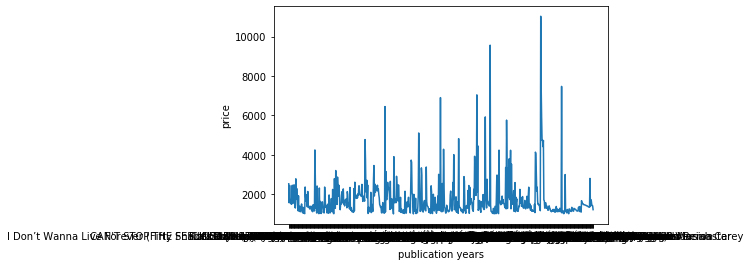

In [224]:
unique = np.array(iceland3['track_name'].unique())
p = [iceland3[iceland3['track_name']==i].loc[:,'streams'].mean() for i in unique]
plt.plot(unique, p)
plt.xlabel('publication years')
plt.ylabel('price')